# Run Random Epsilon Constraint Method

In [1]:
# TODO: make installable!
import sys

sys.path += ['./../']

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt

from qamoo.algorithms.classical_algorithms import random_eps_constraint
from qamoo.configs.configs import ProblemSpecification, RandomEpsConstraintConfig
from qamoo.utils.utils import compute_hypervolume_progress

In [3]:
problem = ProblemSpecification()
problem.data_folder = './../data/'
problem.num_qubits = 42
problem.num_objectives = 3
problem.num_swap_layers = 0
problem.problem_id = 0
print(problem)

ProblemSpecification(data_folder='./../data/', num_qubits=42, num_objectives=3, num_swap_layers=0, problem_id=0)


In [4]:
# algorithm configuration
config = RandomEpsConstraintConfig()
config.num_samples = 1_000
# config.num_samples = 459_629
# config.num_samples = 742_081
config.objective_weights_id = 0
config.shots = 1
config.run_id = 0
config.problem = problem
print(config)

RandomEpsConstraintConfig(name='random_eps_constraint', problem=ProblemSpecification(data_folder='./../data/', num_qubits=42, num_objectives=3, num_swap_layers=0, problem_id=0), run_id=0, num_steps=0, objective_weights_id=0, num_samples=1000, shots=1, eps_seed=42)


In [5]:
random_eps_constraint(config, True)

Folder exists!


  0%|                                                                                                             | 0/1000 [00:00<?, ?it/s]

Restricted license - for non-production use only - expires 2025-11-24


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 108.65it/s]


In [6]:
# define steps where to evaluate HV progress
step_size = 100
steps = range(0, config.num_samples+1, step_size)
print('steps =', list(steps))

steps = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]


In [7]:
compute_hypervolume_progress(problem.problem_folder, config.results_folder, steps)

evaluate samples objective... done.
1 / 10


100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:00<00:00, 41949.03it/s]


#NDP = 66
HV   =  42098.914281290105
2 / 10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 121/121 [00:00<00:00, 40578.14it/s]


#NDP = 113
HV   =  42903.43931249569
3 / 10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 153/153 [00:00<00:00, 33419.88it/s]


#NDP = 146
HV   =  42998.6147547241
4 / 10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 184/184 [00:00<00:00, 36484.28it/s]


#NDP = 174
HV   =  43072.82281704771
5 / 10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 215/215 [00:00<00:00, 34926.81it/s]


#NDP = 205
HV   =  43158.48157602941
6 / 10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [00:00<00:00, 33099.21it/s]


#NDP = 221
HV   =  43193.86867279026
7 / 10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 253/253 [00:00<00:00, 32606.90it/s]


#NDP = 245
HV   =  43218.360038915795
8 / 10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 275/275 [00:00<00:00, 31396.20it/s]


#NDP = 266
HV   =  43250.15754728819
9 / 10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 298/298 [00:00<00:00, 32064.41it/s]


#NDP = 284
HV   =  43275.786884851346
10 / 10


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 314/314 [00:00<00:00, 30981.22it/s]

#NDP = 300
HV   =  43288.772753689955


In [8]:
x, y = config.progress_x_y()
print('Max. HV:', max(y))

Max. HV: 43288.772753689955


In [9]:
# HV estimate
with open(config.results_folder + 'hv_estimate.json', 'r') as f:
    hv_estimate = json.load(f)
print(hv_estimate)

hv_est = float(hv_estimate['hv_estimate'])
p_feasible = float(hv_estimate['feasible_fraction'])
v_bounds = float(hv_estimate['v_bounds'])
num_eps_samples = float(hv_estimate['num_eps_samples'])
ci_95_eps = 1.96 / np.sqrt(num_eps_samples) * np.sqrt(p_feasible * (1 - p_feasible)) * v_bounds
hv_ci_lb = hv_est - ci_95_eps
hv_ci_ub = hv_est + ci_95_eps
print('hv_est:   ', hv_est)
print('95% CI lb:', hv_ci_lb)
print('95% CI ub:', hv_ci_ub)

{'feasible_fraction': 0.848, 'v_bounds': 51212.547436869485, 'hv_estimate': 43428.24022646532, 'num_eps_samples': 1000}
hv_est:    43428.24022646532
95% CI lb: 42288.640934618845
95% CI ub: 44567.8395183118


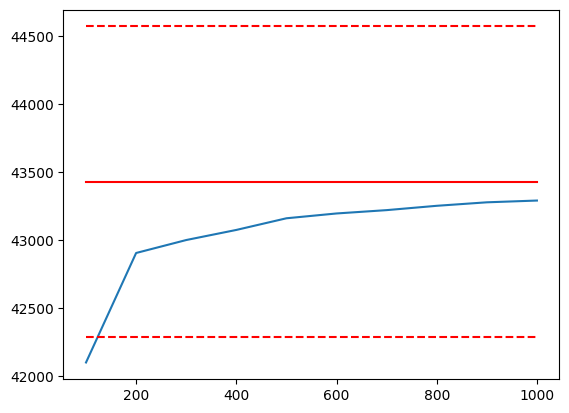

In [10]:
plt.plot(x, y)
plt.plot([min(x), max(x)], [hv_est, hv_est], 'r')
plt.plot([min(x), max(x)], [hv_ci_lb, hv_ci_lb], 'r--')
plt.plot([min(x), max(x)], [hv_ci_ub, hv_ci_ub], 'r--')
plt.show()